# Discussion 1 – Getting Started with Jupyter Notebook & Python

## Welcome 👋

This notebook is designed to help you:

- Get comfortable using Jupyter Notebook  
- Learn basic Python syntax  
- Understand how we’ll use Python throughout the course  

**No prior coding experience is expected. Learning to code is part of the course.**

## How to Use Jupyter Notebook?

This notebook is made of **cells**. There are two main types:

- **Markdown** → text, explanations, instructions  
- **Code** → Python code you can run  

To run a code cell:
1. Click on the cell  
2. Press **Shift + Return** (Mac) or **Shift + Enter** (Windows)


## Python Basics

Let’s start with a simple command to make sure everything works. You should see **Hello, Econ 107!**

In [1]:
print("Hello, Econ 107!")

Hello, Econ 107!


Python can be used like a calculator.

In [2]:
2 + 3

5

Variables store values so we can reuse them.

In [3]:
x = 10
y = 3

x + y, x * y

(13, 30)

Variables are especially useful for economic calculations.

In [4]:
income = 50000
tax_rate = 0.2

tax = income * tax_rate
tax

10000.0

Different kinds of values have different **data types**.

In [5]:
type(5), type(5.0), type("economics"), type(True)

(int, float, str, bool)

## Python Packages for Data Science & Machine Learning

In practice, we rarely use “pure Python” alone. 

Instead, we rely on a small set of powerful libraries that make
data analysis and machine learning efficient and readable.

In this course, the most important ones are:

- **NumPy** → numerical computation  
- **Pandas** → data manipulation  
- **Matplotlib** → visualization  
- **scikit-learn** → machine learning models  

You will see these repeatedly throughout the quarter.

## NumPy: Numerical Computing

NumPy is the foundation of scientific computing in Python.

It is optimized for:
- Vectors and matrices  
- Fast numerical operations  
- Linear algebra  

Machine learning models (including gradient descent) are built on NumPy-style operations. 

NumPy arrays behave like mathematical vectors. These vectorized operations are what make machine learning algorithms fast.


In [6]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])

x, x.mean(), x * 2

(array([1, 2, 3, 4, 5]), 3.0, array([ 2,  4,  6,  8, 10]))

## Pandas: Working with Data

Pandas is designed for working with **tabular data** – exactly how most economic data looks.

### Creating a DataFrame

A DataFrame is like an Excel spreadsheet or a Stata dataset.

In [7]:
import pandas as pd

df = pd.DataFrame({
    "age": [25, 32, 45, 52],
    "education": [12, 16, 18, 16],
    "wage": [35000, 52000, 78000, 83000]
})

df

,age,education,wage
0,25,12,35000
1,32,16,52000
2,45,18,78000
3,52,16,83000


### Inspecting Data

These commands are used constantly in practice.

In [8]:
df.head()

,age,education,wage
0,25,12,35000
1,32,16,52000
2,45,18,78000
3,52,16,83000


In [9]:
df.describe()

,age,education,wage
count,4.000000,4.000000,4.000000
mean,38.500000,15.500000,62000.000000
std,12.233833,2.516611,22553.639765
min,25.000000,12.000000,35000.000000
25%,30.250000,15.000000,47750.000000
50%,38.500000,16.000000,65000.000000
75%,46.750000,16.500000,79250.000000
max,52.000000,18.000000,83000.000000


### Selecting Columns

In machine learning, we typically separate:

- **X** → features (covariates)  
- **y** → outcome variable  

In [10]:
X = df[["age", "education"]]
y = df["wage"]

X, y

(   age  education
 0   25         12
 1   32         16
 2   45         18
 3   52         16,
 0    35000
 1    52000
 2    78000
 3    83000
 Name: wage, dtype: int64)

## Matplotlib: Visualization

Visualization helps us understand data patterns before fitting models.

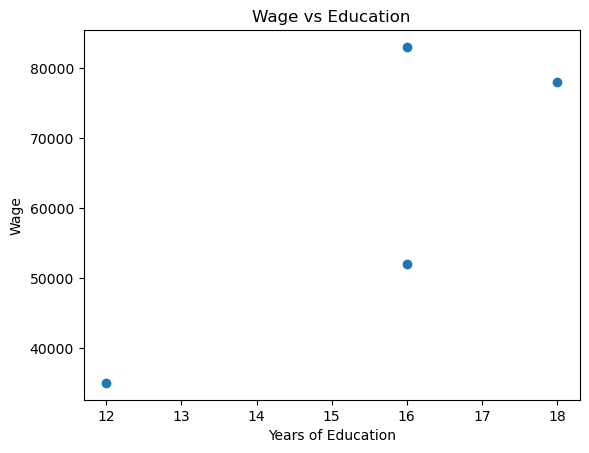

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df["education"], df["wage"])
plt.xlabel("Years of Education")
plt.ylabel("Wage")
plt.title("Wage vs Education")
plt.show()

Plots like this help motivate regression models.

## Linear Regression as a Prediction Model

We now fit a linear regression using **scikit-learn**.

In this course, we will treat linear regression as:
- A prediction algorithm  
- A benchmark model  
- A stepping stone to more complex methods  

This is the same model as Ordinary Least Squares Regression (OLS), but framed computationally.

In [12]:
from sklearn.linear_model import LinearRegression

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Model Coefficients
# These correspond to the estimated β coefficients in OLS
model.coef_, model.intercept_

(array([1519.79218209, 2009.15388422]), -27653.884215734754)

In [13]:
# Making Predictions
y_pred = model.predict(X)
y_pred

array([34450.76694706, 53125.92775854, 76901.53389411, 83521.7714003 ])

In [14]:
from sklearn.metrics import mean_squared_error

# Evaluating Model Performance
# A common metric is Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

872.9609733315208

## Why This Matters

In this course, we will repeatedly:

1. Load data with Pandas  
2. Perform data cleaning
3. Visualize patterns with Matplotlib  
4. Fit models with scikit-learn  
5. Evaluate models using chosen error metrics

These tools form the **core workflow of machine learning for economists**.

## In-class Exercise

OLS with CPC Wage Data

### Step 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Step 2: Load Data

In [16]:
xml_file = "cps_00001.xml"

tree = ET.parse(xml_file)
root = tree.getroot()

ns = {"ddi": "ddi:codebook:2_5"}

variables = []

for var in root.findall(".//ddi:dataDscr/ddi:var", ns):
    name = var.attrib["name"]
    loc = var.find("ddi:location", ns)
    start = int(loc.attrib["StartPos"])
    width = int(loc.attrib["width"])
    variables.append((name, start, width))

variables.sort(key=lambda x: x[1])

names = [v[0] for v in variables]
colspecs = [(v[1] - 1, v[1] - 1 + v[2]) for v in variables]

dat_file = "cps_00001.dat"

df = pd.read_fwf(
    dat_file,
    colspecs=colspecs,
    names=names
)

df.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,PERNUM,CPSIDP,CPSIDV,ASECWT,AGE,SEX,OCC,UHRSWORKT,EDUC,INCWAGE
0,2023,1,3,20220102726800,1,15800700,1,20220102726801,202201027268011,15800700,66,2,0,999,73,0
1,2023,1,3,20220102726800,1,15800700,2,20220102726802,202201027268022,15800700,68,2,0,999,73,0
2,2023,2,3,20230100363800,1,17896000,1,20230100363801,202301003638011,17896000,52,2,0,999,73,0
3,2023,2,3,20230100363800,1,17896000,2,20230100363802,202301003638021,17896000,51,1,4760,40,81,42000
4,2023,10,3,20220202744200,1,13079200,1,20220202744201,202202027442011,13079200,78,2,0,999,73,0


### Step 3: Data Inspection
To guide data inspection, answer the following questions with relevant code

In [17]:
# Q1: Is the sample roughly balanced by gender or skewed?
df = df.copy()
df.SEX.value_counts()

SEX
2    74834
1    71299
Name: count, dtype: int64

In [19]:
# Q2: 
# Which variables should not be used as regressors? 
remove_col = ['SERIAL', 'CPSID', 'ASECFLAG', 'ASECWTH', 'PERNUM','CPSIDP', 'CPSIDV', 'ASECWT', 'YEAR', 'MONTH']

# Remove these variables
df = df.drop(columns = remove_col)
df.head()

,AGE,SEX,OCC,UHRSWORKT,EDUC,INCWAGE
0,66,2,0,999,73,0
1,68,2,0,999,73,0
2,52,2,0,999,73,0
3,51,1,4760,40,81,42000
4,78,2,0,999,73,0


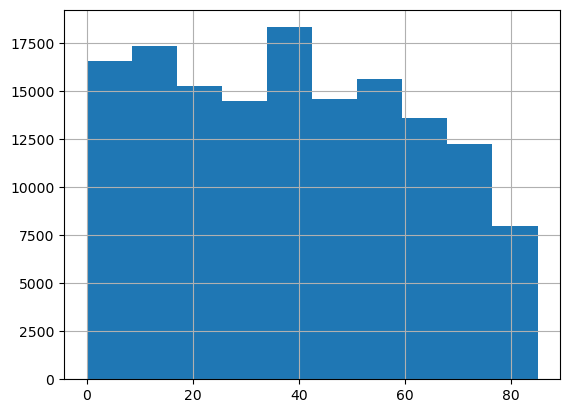

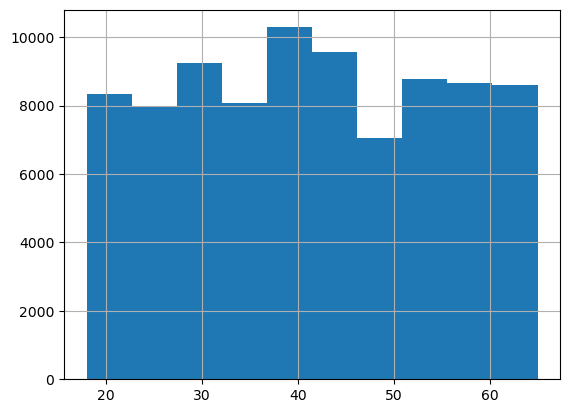

In [20]:
# Q3:
# What is the distribution of AGE in this dataset?
df.AGE.hist()
plt.show()
# Filter to working age only (18 <= AGE <= 65)
df = df.loc[df.AGE.between(18, 65)]
df.AGE.hist()
plt.show()

In [21]:
# Q4:
# Inspect UHRSWORKT, does it look reasonable to you?
df.UHRSWORKT.unique()
# Filter to common work hours only (0 <= UHRSWORKT <= 80)
df = df.loc[df.UHRSWORKT.between(0, 80)]
df.head()

,AGE,SEX,OCC,UHRSWORKT,EDUC,INCWAGE
3,51,1,4760,40,81,42000
11,63,1,8990,32,81,22000
12,64,2,2014,40,111,45000
19,37,2,410,30,123,70000
20,39,1,340,60,92,0


In [22]:
# Q5:
# Are there individuals with 0 or missing wage?
print(df.INCWAGE.isna().sum())
# Filter to include individuals with POSITIVE wage only
df = df.loc[df.INCWAGE > 0]
df.head()

0


,AGE,SEX,OCC,UHRSWORKT,EDUC,INCWAGE
3,51,1,4760,40,81,42000
11,63,1,8990,32,81,22000
12,64,2,2014,40,111,45000
19,37,2,410,30,123,70000
28,63,2,3603,32,73,35002


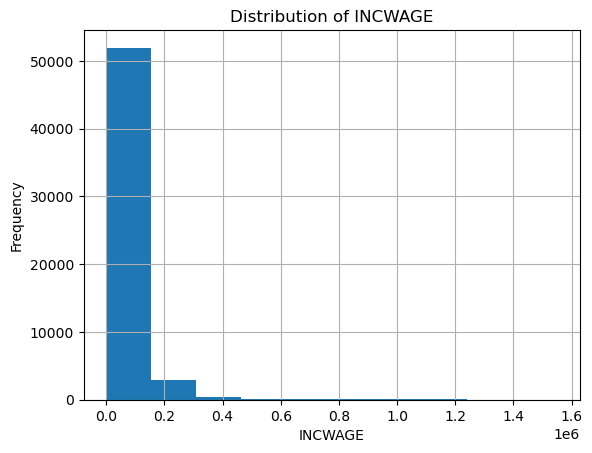

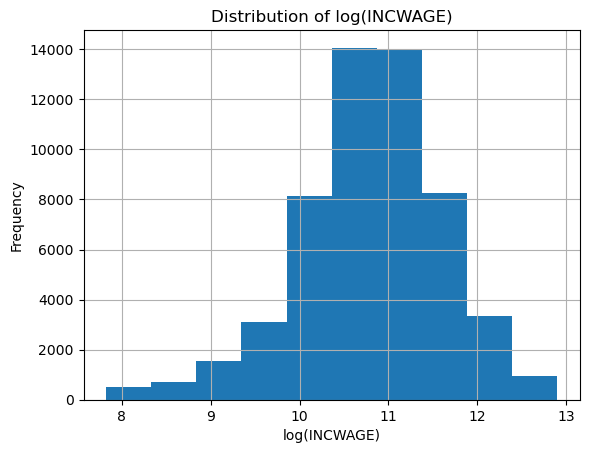

In [23]:
# Q6:
# After removal, what is the distribution of wage?
plt.figure()
df.INCWAGE.hist()
plt.title("Distribution of INCWAGE")
plt.xlabel("INCWAGE")
plt.ylabel("Frequency")
plt.show()

# How would you transform it before running OLS? Why?
lower = df.INCWAGE.quantile(0.01)
upper = df.INCWAGE.quantile(0.99)

df = df[(df.INCWAGE >= lower) & (df.INCWAGE <= upper)]

df["log_wage"] = np.log(df["INCWAGE"])
plt.figure()
df["log_wage"].hist()
plt.title("Distribution of log(INCWAGE)")
plt.xlabel("log(INCWAGE)")
plt.ylabel("Frequency")
plt.show()

### Step 4: Simple Visualization

| EDUC Code        | Education Level                  |
|--------------------|---------------------------------|
| 2, 10, 20, 30, 40, 50, 60, 71 | Less than High School          |
| 73                 | High School Diploma              |
| 81, 91, 92         | Associate Degree  |
| 111, 123, 124, 125 | Bachelor's Degree or Higher      |


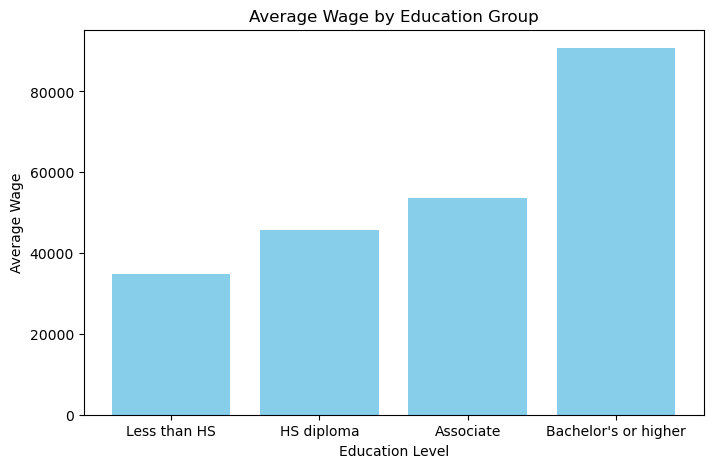

In [24]:
# Plot average INCWAGE by EDUC Code category

# Define education groups
def map_educ(code):
    if code in [2, 10, 20, 30, 40, 50, 60, 71]:
        return "Less than HS"
    elif code == 73:
        return "HS diploma"
    elif code in [81, 91, 92]:
        return "Associate"
    else:  # 111, 123, 124, 125
        return "Bachelor's or higher"

# Get average INCWAGE by group
df["educ_group"] = df["EDUC"].apply(map_educ)
educ_means = df.groupby("educ_group")["INCWAGE"].mean().sort_values()

# Plot with ascending order
plt.figure(figsize=(8,5))
plt.bar(educ_means.index, educ_means.values, color='skyblue')
plt.xlabel("Education Level")
plt.ylabel("Average Wage")
plt.title("Average Wage by Education Group")
plt.show()

### Step 5: Run OLS
Use log_wage as outcome variable

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Features
numeric_features = ["AGE", "UHRSWORKT"]
categorical_features = ["SEX", "EDUC"]

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ],
    remainder="passthrough"
)

# Build pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit model
X = df[["AGE", "UHRSWORKT", "SEX", "EDUC"]]
y = df["log_wage"]
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# What does this number mean?
percent_error = np.exp(0.6366) - 1
print(percent_error)

RMSE: 0.6366135558296794
0.8900437935621355
